# RGB Histogram Equilization                    

### importing libraries

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline

### reading Image

In [29]:
Img=cv2.imread('/home/tejas/Github/cvg_2020/Images/leena.jpeg')

In [30]:
a=Img.shape
print(a)

(373, 497, 3)


### Calculating histogram of given image and Plotting

/home/tejas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/home/tejas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':
/home/tejas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly i

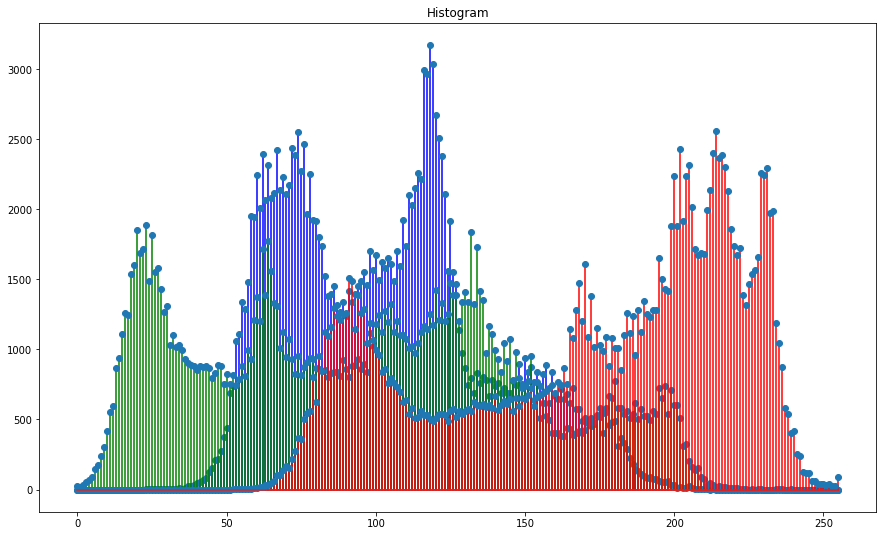

In [46]:
rhist,ghist,bhist=np.zeros(256),np.zeros(256),np.zeros(256) ## reason 8bit image
for i in range (a[0]):
  for j in range (a[1]):
     bhist[Img[i,j,0]]+=1
     ghist[Img[i,j,1]]+=1
     rhist[Img[i,j,2]]+=1
        
plt.stem(bhist,linefmt='blue')
plt.stem(ghist,linefmt='green')
plt.stem(rhist,linefmt='red')
plt.title("Histogram")
plt.rcParams['figure.figsize']=(15,9)

### Calculating Cummulative Histogram of given Image and plotting

/home/tejas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/home/tejas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/home/tejas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a s

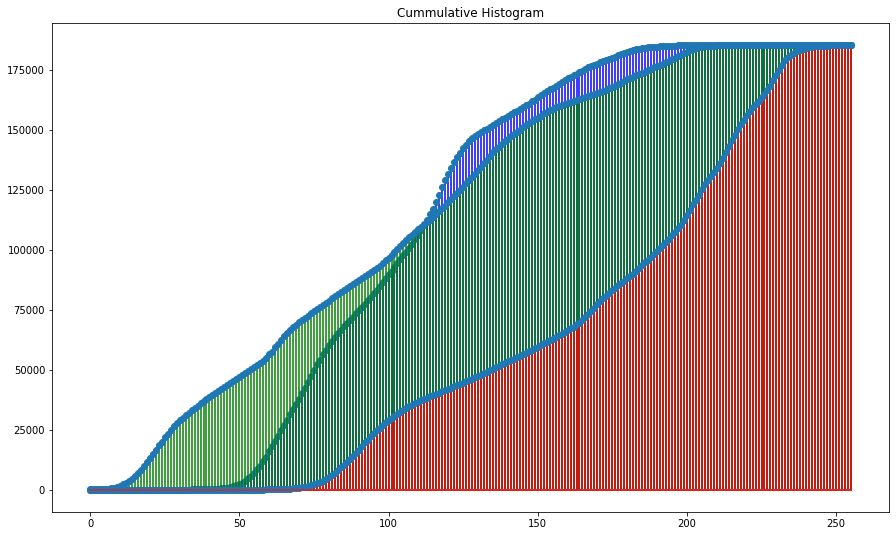

In [44]:
rch=np.zeros(256)
gch=np.zeros(256)
bch=np.zeros(256)
for i in range (len(rhist)):
    if i==0:
        rch[i]=rhist[i]
    else:
        rch[i]=rhist[i]+rch[i-1]
        
for i in range (len(ghist)):
    if i==0:
        gch[i]=ghist[i]
    else:
        gch[i]=ghist[i]+gch[i-1]
        
for i in range (len(bhist)):
    if i==0:
        bch[i]=bhist[i]
    else:
        bch[i]=bhist[i]+bch[i-1]
        
        
plt.stem(bch,linefmt='blue')
plt.stem(gch,linefmt='green')
plt.stem(rch,linefmt='red')
plt.title("Cummulative Histogram")
plt.rcParams['figure.figsize']=(15,9)

#### Finding first index for which
######  $S(m)$ $\neq$ $0$

In [49]:
for i in range (len(rch)):
    if rch[i]!=0:
        rm=i
        break
        
        
for i in range (len(gch)):
    if gch[i]!=0:
        gm=i
        break
        
for i in range (len(bch)):
    if bch[i]!=0:
        bm=i
        break

#### Creating LUT(Look Up Table)

###### $T(k)$ = {  [  $S(k)$   -  $S(m)$]  $\div$   [  $S(255)$   - $S(m)$  ]   }  $\times$   255

In [51]:
rLT=np.zeros(256)
bLT=np.zeros(256)
gLT=np.zeros(256)

for k in range (rm,256):
    rLT[k]=((rch[k]-rch[rm])/(rch[255]-rch[rm]))*255
    
for k in range (gm,256):
    gLT[k]=((gch[k]-gch[gm])/(gch[255]-gch[gm]))*255
    
for k in range (bm,256):
    bLT[k]=((bch[k]-bch[bm])/(bch[255]-bch[bm]))*255



#### Applying LUT T to I ,get equalized Image  J
###### $J(x,y)$ = $T(I(x,y))$

In [54]:
I1=np.zeros((a[0],a[1],a[2]),dtype='uint8')

for i in range (a[0]):
    for j in range (a[1]):
        I1[i,j,0]=round(bLT[Img[i,j,0]])
        I1[i,j,1]=round(gLT[Img[i,j,1]])        
        I1[i,j,2]=round(rLT[Img[i,j,2]])        
        
        
cv2.imwrite("RGBEQ.jpeg",I1)

True

#### Ploting Histogram of Equalized Image

/home/tejas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':
/home/tejas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.
/home/tejas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollecti

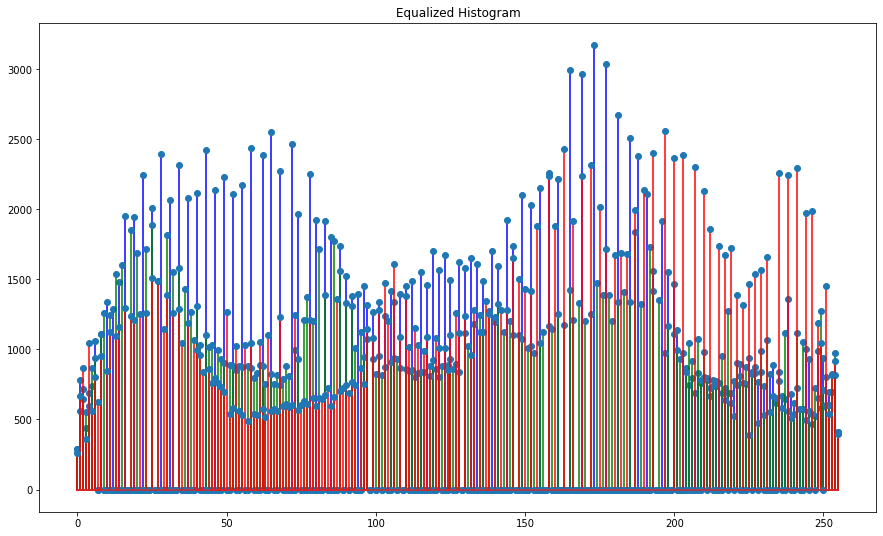

In [55]:
nrhist,nghist,nbhist=np.zeros(256),np.zeros(256),np.zeros(256) ## reason 8bit image
for i in range (a[0]):
  for j in range (a[1]):
     nbhist[I1[i,j,0]]+=1
     nghist[I1[i,j,1]]+=1
     nrhist[I1[i,j,2]]+=1


plt.stem(nbhist,linefmt='blue')
plt.stem(nghist,linefmt='green')
plt.stem(nrhist,linefmt='red')
plt.title("Equalized Histogram")
plt.rcParams['figure.figsize']=(15,9)